# Project 2 : Ames Housing Price Prediction

### Assumptions
1. Remodded home, and even newer, will be more expensive

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Import datasets

In [2]:
train=pd.read_csv('datasets/train.csv')

In [3]:
test=pd.read_csv('datasets/test.csv')

### Data Sneak Peek

In [4]:
train.shape

(2051, 81)

In [5]:
test.shape

(879, 80)

In [6]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [7]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

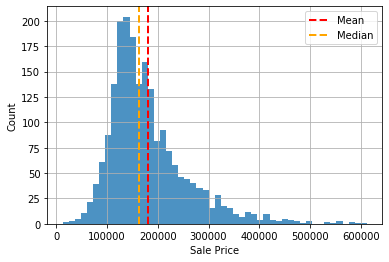

In [9]:
train['SalePrice'].hist(bins=50, alpha=0.8)
plt.axvline(train['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(train['SalePrice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()

### Data Cleaning

##### Rename columns for easy modification
1. Strip spaces
2. change to lowercase

In [10]:
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '').str.replace('/', '')
train.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pav

##### Check for null values and datatypes

In [11]:
#creating an overview function to evaluate datatypes/nul percentages and unique values
def overview(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
#     null_percentage = df.apply(lambda x: x.unique().shape[0])
#     null_percentage = (df.isnull().sum()/ obs) * 100
#     skewness = df.skew()
#     kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'uniques']
        str = pd.concat([types, counts, distincts, nulls, uniques], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, uniques, nulls, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'uniques', 'nulls', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
details = overview(train, 'saleprice')
display(details.sort_values(by='corr saleprice', ascending=False))

Data shape: (2051, 81)
___________________________
Data types:
 object     42
int64      28
float64    11
Name: types, dtype: int64
___________________________


types  counts  distincts  \
saleprice        int64    2051        828   
overallqual      int64    2051         10   
grlivarea        int64    2051       1053   
garagearea     float64    2050        515   
garagecars     float64    2050          7   
totalbsmtsf    float64    2050        893   
1stflrsf         int64    2051        915   
yearbuilt        int64    2051        113   
yearremodadd     int64    2051         61   
fullbath         int64    2051          5   
garageyrblt    float64    1937        101   
masvnrarea     float64    2029        374   
totrmsabvgrd     int64    2051         14   
fireplaces       int64    2051          5   
bsmtfinsf1     float64    2050        822   
lotfrontage    float64    1721        119   
openporchsf      int64    2051        223   
wooddecksf       int64    2051        322   
lotarea          int64    2051       1476   
bsmtfullbath   float64    2049          5   
halfbath         int64    2051          3   
2ndflrsf         int64    2051        504   
bsmtunfsf      float64    2050        968   
bedroomabvgr     int64    2051          8   
screenporch      int64    2051        100   
3ssnporch        int64    2051         22   
mosold           int64    2051         12   
poolarea         int64    2051         10   
bsmtfinsf2     float64    2050        206   
miscval          int64    2051         28   
yrsold           int64    2051          5   
lowqualfinsf     int64    2051         31   
bsmthalfbath   float64    2049          4   
id               int64    2051       2051   
mssubclass       int64    2051         16   
overallcond      int64    2051          9   
kitchenabvgr     int64    2051          4   
enclosedporch    int64    2051        159   
pid              int64    2051       2051   
mszoning        object    2051          7   
street          object    2051          2   
alley           object     140          3   
lotshape        object    2051          4   
landcontour     object    2051          4   
utilities       object    2051          3   
lotconfig       object    2051          5   
landslope       object    2051          3   
neighborhood    object    2051         28   
condition1      object    2051          9   
condition2      object    2051          8   
bldgtype        object    2051          5   
housestyle      object    2051          8   
roofstyle       object    2051          6   
roofmatl        object    2051          6   
exterior1st     object    2051         15   
exterior2nd     object    2051         15   
masvnrtype      object    2029          5   
exterqual       object    2051          4   
extercond       object    2051          5   
foundation      object    2051          6   
bsmtqual        object    1996          6   
bsmtcond        object    1996          6   
bsmtexposure    object    1993          5   
bsmtfintype1    object    1996          7   
bsmtfintype2    object    1995          7   
heating         object    2051          5   
heatingqc       object    2051          5   
centralair      object    2051          2   
electrical      object    2051          5   
kitchenqual     object    2051          4   
functional      object    2051          8   
fireplacequ     object    1051          6   
garagetype      object    1938          7   
garagefinish    object    1937          4   
garagequal      object    1937          6   
garagecond      object    1937          6   
paveddrive      object    2051          3   
poolqc          object       9          5   
fence           object     400          5   
miscfeature     object      65          6   
saletype        object    2051          9   

                                                         uniques  nulls  \
saleprice      [[130500, 220000, 109000, 174000, 138500, 1900...      0   
overallqual                    [[6, 7, 5, 8, 10, 4, 9, 3, 2, 1]]      0   
grlivarea      [[1479, 2122, 1057, 1444, 1445, 1888, 1072, 11...      0   
garagearea     [[475.0, 55

##### Treating null values

In [13]:
train.isnull().sum().sort_values(ascending=False)

poolqc           2042
miscfeature      1986
alley            1911
fence            1651
fireplacequ      1000
lotfrontage       330
garagefinish      114
garagecond        114
garagequal        114
garageyrblt       114
garagetype        113
bsmtexposure       58
bsmtfintype2       56
bsmtfintype1       55
bsmtcond           55
bsmtqual           55
masvnrtype         22
masvnrarea         22
bsmthalfbath        2
bsmtfullbath        2
garagecars          1
garagearea          1
bsmtunfsf           1
bsmtfinsf2          1
totalbsmtsf         1
bsmtfinsf1          1
overallcond         0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearremodadd        0
yearbuilt           0
saleprice           0
overallqual         0
landcontour         0
pid                 0
mssubclass          0
mszoning            0
lotarea             0
street              0
lotshape            0
utilities           0
housestyle          0
lotconfig           0
landslope 

1. Treating Masonry 

a. Modifying 'masvnrtype' and 'masvnrarea'

In [14]:
train[(train['masvnrarea']==0) & (train['masvnrtype']== 'BrkFace')][['masvnrarea','masvnrtype']]

masvnrarea masvnrtype
669          0.0    BrkFace
1136         0.0    BrkFace

In [15]:
train[train['masvnrtype']== 'BrkFace']['masvnrarea'].median()

200.0

In [16]:
train.at[669, 'masvnrarea'] = 200

In [17]:
train.at[1136, 'masvnrarea'] = 200

1b. If both masonry area =0 and masonry type is null, fill in with 0 and None

In [18]:
train.masvnrarea = train.masvnrarea.fillna(0)

In [19]:
train.masvnrtype = train.masvnrtype.fillna('None')

In [20]:
#checking to see if nulls are updated
train.masvnrtype.isnull().sum()

0

In [21]:
#checking to see if nulls are updated
train.masvnrarea.isnull().sum()

0

2. Treating Fireplace Quality: if fireplaces=0, fireplacequ should be updated to NA

In [22]:
train.loc[(train.fireplaces==0) & (train.fireplacequ.isnull()), ['fireplacequ']] 

fireplacequ
0            NaN
2            NaN
3            NaN
4            NaN
6            NaN
7            NaN
8            NaN
10           NaN
11           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
19           NaN
23           NaN
24           NaN
28           NaN
33           NaN
39           NaN
40           NaN
43           NaN
44           NaN
46           NaN
48           NaN
49           NaN
50           NaN
53           NaN
55           NaN
56           NaN
57           NaN
58           NaN
64           NaN
65           NaN
67           NaN
71           NaN
73           NaN
74           NaN
75           NaN
77           NaN
78           NaN
79           NaN
80           NaN
83           NaN
84           NaN
86           NaN
87           NaN
89           NaN
90           NaN
92           NaN
93           NaN
95           NaN
101          NaN
103          NaN
105          NaN
106          NaN
109          NaN
113          NaN
114          NaN
119          NaN
121          NaN
122          NaN
124          NaN
130          NaN
131          NaN
134          NaN
135          NaN
136          NaN
139          NaN
140          NaN
142          NaN
143          NaN
154          NaN
155          NaN
156          NaN
157          NaN
158          NaN
160          NaN
162          NaN
163          NaN
164          NaN
165          NaN
168          NaN
169          NaN
170          NaN
171          NaN
172          NaN
179          NaN
180          NaN
181          NaN
182          NaN
183          NaN
184          NaN
187          NaN
194          NaN
195          NaN
196          NaN
197          NaN
200          NaN
204          NaN
205          NaN
211          NaN
212          NaN
213          NaN
214          NaN
216          NaN
217          NaN
220          NaN
221          NaN
222          NaN
225          NaN
226          NaN
228          NaN
233          NaN
234          NaN
235          NaN
238          NaN
243          NaN
247          NaN
248          NaN
249          NaN
251          NaN
252          NaN
254          NaN
255          NaN
258          NaN
259          NaN
260          NaN
261          NaN
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
267          NaN
269          NaN
271          NaN
272          NaN
273          NaN
276          NaN
279          NaN
283          NaN
287          NaN
288          NaN
289          NaN
290          NaN
291          NaN
293          NaN
296          NaN
297          NaN
299          NaN
301          NaN
303          NaN
304          NaN
305          NaN
306          NaN
307          NaN
312          NaN
313          NaN
315          NaN
318          NaN
320          NaN
322          NaN
323          NaN
324          NaN
325          NaN
326          NaN
329          NaN
333          NaN
334          NaN
336          NaN
339          NaN
340          NaN
342          NaN
343          NaN
344          NaN
345          NaN
346          NaN
349          NaN
351          NaN
352          NaN
354          NaN
356          NaN
357          NaN
358          NaN
362          NaN
363          NaN
365          NaN
367          NaN
368          NaN
372          NaN
374          NaN
375          NaN
377          NaN
379          NaN
380          NaN
382          NaN
383          NaN
386          NaN
387          NaN
389          NaN
390          NaN
391          NaN
394          NaN
395          NaN
396          NaN
397          NaN
401          NaN
402          NaN
403          NaN
406          NaN
407          NaN
408          NaN
409          NaN
410          NaN
416          NaN
418          NaN
421          NaN
426          NaN
430          NaN
432          NaN
433          NaN
435          NaN
436          NaN
437          NaN
439          NaN
440          NaN
441          NaN
442          NaN
444          NaN
445          NaN
449          NaN
450          NaN
453          NaN
454       

In [23]:
train.loc[(train.fireplaces==0) & (train.fireplacequ.isnull()), ['fireplacequ']] = 'None'

In [24]:
#checking to see if nulls are updated
train.fireplaces.isnull().sum()

0

In [25]:
#checking to see if nulls are updated
train.fireplacequ.isnull().sum()

0

3. Treating poolqc: if poolarea =0, poolqc should be updated to NA

In [26]:
train.loc[(train.poolarea==0) & (train.poolqc.isnull()), ['poolqc']] = 'None'

In [27]:
#checking to see if nulls are updated
train.poolarea.isnull().sum()

0

In [28]:
#checking to see if nulls are updated
train.poolqc.isnull().sum()

0

4. Treating lotfrontage

Filling in null as the neighborhood's average: We make the assumption that the lot fortage for a given house is similar to other properties in the same neighbourhood.

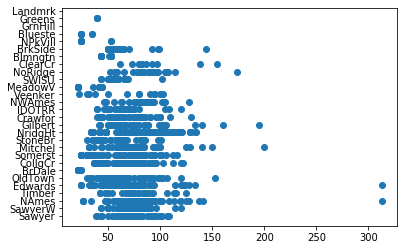

In [29]:
plt.scatter(x=train.lotfrontage,y=train.neighborhood);

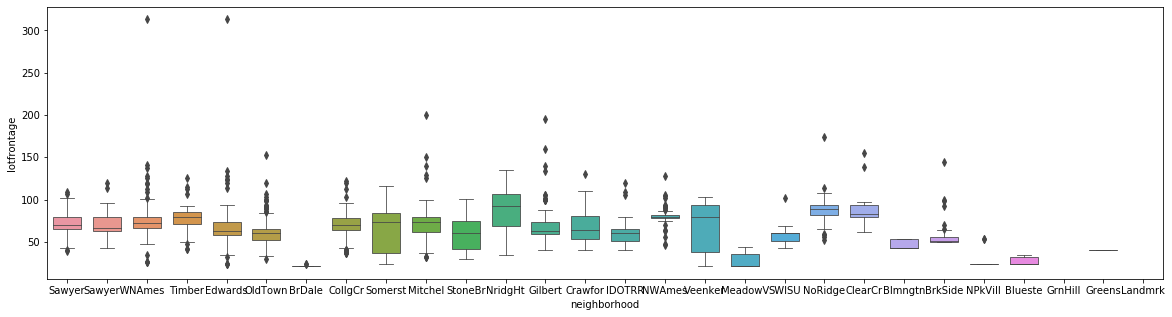

In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(x=train['neighborhood'], y=train['lotfrontage'], width=0.7, linewidth=0.8);

In [31]:
neighborhood_means = train.groupby('neighborhood')['lotfrontage'].mean()
neighborhood_means

neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    56.357143
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    66.930233
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     61.890625
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: lotfrontage, dtype: float64

In [32]:
train['lotfrontage'] = train.apply(lambda x: neighborhood_means[x['neighborhood']] if np.isnan(x['lotfrontage']) else x['lotfrontage'], axis=1)

In [33]:
#checking to if nulls remain
train.lotfrontage.isnull().sum()

3

As there are 3 values that do not have values after mapping to the neighbourhood mean, an average of the lotfrontage for all properties will be assigned

In [34]:
train['lotfrontage'] = train['lotfrontage'].fillna(train['lotfrontage'].mean())

In [35]:
#checking to if nulls remain
train.lotfrontage.isnull().sum()

0

5. Fixing Garage

a. if garagetype == NA, means there is no garage, thus garge yrblt, garagecars, garagequal, garagefinish, garagearea should be zero

In [36]:
#it is also clear from the table below that if one garage category is null, the other garage categories are null too, supporting the logic above
train[['garagearea','garagetype', 'garagequal', 'garagecars','garageyrblt','garagefinish','garagecond']].sort_values(by='garagetype',na_position='first')

garagearea garagetype garagequal  garagecars  garageyrblt garagefinish  \
28           0.0        NaN        NaN         0.0          NaN          NaN   
53           0.0        NaN        NaN         0.0          NaN          NaN   
65           0.0        NaN        NaN         0.0          NaN          NaN   
79           0.0        NaN        NaN         0.0          NaN          NaN   
101          0.0        NaN        NaN         0.0          NaN          NaN   
103          0.0        NaN        NaN         0.0          NaN          NaN   
114          0.0        NaN        NaN         0.0          NaN          NaN   
120          0.0        NaN        NaN         0.0          NaN          NaN   
134          0.0        NaN        NaN         0.0          NaN          NaN   
136          0.0        NaN        NaN         0.0          NaN          NaN   
139          0.0        NaN        NaN         0.0          NaN          NaN   
162          0.0        NaN        NaN         0.0          NaN          NaN   
235          0.0        NaN        NaN         0.0          NaN          NaN   
256          0.0        NaN        NaN         0.0          NaN          NaN   
260          0.0        NaN        NaN         0.0          NaN          NaN   
264          0.0        NaN        NaN         0.0          NaN          NaN   
276          0.0        NaN        NaN         0.0          NaN          NaN   
334          0.0        NaN        NaN         0.0          NaN          NaN   
356          0.0        NaN        NaN         0.0          NaN          NaN   
382          0.0        NaN        NaN         0.0          NaN          NaN   
406          0.0        NaN        NaN         0.0          NaN          NaN   
409          0.0        NaN        NaN         0.0          NaN          NaN   
426          0.0        NaN        NaN         0.0          NaN          NaN   
437          0.0        NaN        NaN         0.0          NaN          NaN   
445          0.0        NaN        NaN         0.0          NaN          NaN   
457          0.0        NaN        NaN         0.0          NaN          NaN   
486          0.0        NaN        NaN         0.0          NaN          NaN   
530          0.0        NaN        NaN         0.0          NaN          NaN   
542          0.0        NaN        NaN         0.0          NaN          NaN   
555          0.0        NaN        NaN         0.0          NaN          NaN   
562          0.0        NaN        NaN         0.0          NaN          NaN   
579          0.0        NaN        NaN         0.0          NaN          NaN   
580          0.0        NaN        NaN         0.0          NaN          NaN   
612          0.0        NaN        NaN         0.0          NaN          NaN   
636          0.0        NaN        NaN         0.0          NaN          NaN   
653          0.0        NaN        NaN         0.0          NaN          NaN   
663          0.0        NaN        NaN         0.0          NaN          NaN   
689          0.0        NaN        NaN         0.0          NaN          NaN   
692          0.0        NaN        NaN         0.0          NaN          NaN   
700          0.0        NaN        NaN         0.0          NaN          NaN   
705          0.0        NaN        NaN         0.0          NaN          NaN   
708          0.0        NaN        NaN         0.0          NaN          NaN   
722          0.0        NaN        NaN         0.0          NaN          NaN   
736          0.0        NaN        NaN         0.0          NaN          NaN   
741          0.0        NaN        NaN         0.0          NaN          NaN   
783          0.0        NaN        NaN         0.0          NaN          NaN   
787          0.0        NaN        NaN         0.0          NaN          NaN   
791          0.0        NaN        NaN         0.0          NaN          NaN   
814          0.0        NaN        NaN         0.0          NaN          NaN   
822   

In [37]:
train['garagetype'] = train['garagetype'].fillna('None')
train['garagefinish'] = train['garagefinish'].fillna('None')
train['garagequal'] = train['garagequal'].fillna('None')
train['garagecond'] = train['garagecond'].fillna('None')
train['garageyrblt'] = train['garageyrblt'].fillna(0)
train['garagearea'] = train['garagearea'].fillna(0)
train['garagecars'] = train['garagecars'].fillna(0)

In [38]:
#checking to if nulls remain
train[['garagearea','garagetype', 'garagequal', 'garagecars','garageyrblt','garagefinish','garagecond']].isnull().sum()

garagearea      0
garagetype      0
garagequal      0
garagecars      0
garageyrblt     0
garagefinish    0
garagecond      0
dtype: int64

6. Fixing Basement

Unlike Garage component, there are several properties where some features are filled, where others are not. Let's deal with these individually, and then assign the remaining to all 0s/None

In [39]:
train[['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']].sort_values(by='bsmtexposure',na_position='first')

bsmtexposure bsmtfintype2 bsmtcond bsmtfintype1 bsmtqual
12            NaN          NaN      NaN          NaN      NaN
93            NaN          NaN      NaN          NaN      NaN
114           NaN          NaN      NaN          NaN      NaN
146           NaN          NaN      NaN          NaN      NaN
183           NaN          NaN      NaN          NaN      NaN
240           NaN          NaN      NaN          NaN      NaN
249           NaN          NaN      NaN          NaN      NaN
256           NaN          NaN      NaN          NaN      NaN
390           NaN          NaN      NaN          NaN      NaN
437           NaN          NaN      NaN          NaN      NaN
485           NaN          NaN      NaN          NaN      NaN
499           NaN          NaN      NaN          NaN      NaN
514           NaN          NaN      NaN          NaN      NaN
580           NaN          NaN      NaN          NaN      NaN
581           NaN          NaN      NaN          NaN      NaN
616           NaN          NaN      NaN          NaN      NaN
635           NaN          NaN      NaN          NaN      NaN
642           NaN          NaN      NaN          NaN      NaN
696           NaN          NaN      NaN          NaN      NaN
700           NaN          NaN      NaN          NaN      NaN
737           NaN          NaN      NaN          NaN      NaN
772           NaN          NaN      NaN          NaN      NaN
790           NaN          NaN      NaN          NaN      NaN
794           NaN          NaN      NaN          NaN      NaN
924           NaN          NaN      NaN          NaN      NaN
933           NaN          NaN      NaN          NaN      NaN
954           NaN          NaN      NaN          NaN      NaN
1007          NaN          NaN      NaN          NaN      NaN
1022          NaN          NaN      NaN          NaN      NaN
1049          NaN          NaN      NaN          NaN      NaN
1089          NaN          NaN      NaN          NaN      NaN
1098          NaN          NaN      NaN          NaN      NaN
1125          NaN          NaN      NaN          NaN      NaN
1157          NaN          NaN      NaN          NaN      NaN
1211          NaN          NaN      NaN          NaN      NaN
1222          NaN          NaN      NaN          NaN      NaN
1252          NaN          NaN      NaN          NaN      NaN
1256          NaN          NaN      NaN          NaN      NaN
1270          NaN          NaN      NaN          NaN      NaN
1327          NaN          NaN      NaN          NaN      NaN
1331          NaN          NaN      NaN          NaN      NaN
1377          NaN          NaN      NaN          NaN      NaN
1387          NaN          NaN      NaN          NaN      NaN
1428          NaN          NaN      NaN          NaN      NaN
1456          NaN          Unf       TA          Unf       Gd
1481          NaN          NaN      NaN          NaN      NaN
1547          NaN          Unf       TA          Unf       Gd
1594          NaN          NaN      NaN          NaN      NaN
1620          NaN          NaN      NaN          NaN      NaN
1681          NaN          NaN      NaN          NaN      NaN
1684          NaN          NaN      NaN          NaN      NaN
1686          NaN          NaN      NaN          NaN      NaN
1859          NaN          NaN      NaN          NaN      NaN
1875          NaN          NaN      NaN          NaN      NaN
1889          NaN          NaN      NaN          NaN      NaN
1933          NaN          NaN      NaN          NaN      NaN
1997          NaN          Unf       TA          Unf       Gd
2010          NaN          NaN      NaN          NaN      NaN
607            Av          Unf       TA          GLQ       Gd
991            Av          Unf       TA          BLQ       TA
1715           Av          Unf       TA          GLQ       Gd
461            Av          Unf       TA          Unf       Gd
1723           Av          Unf       TA          ALQ       TA
457            Av          Unf       

Upon further assessment of these properties, they share the same ratings for other features: Unfinished basement, typical basement condition, but with good basement height. Thus, we will assign the most common value of bsmtexposure based on these common attributes

In [40]:
train.iloc[1997][['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']]

bsmtexposure    NaN
bsmtfintype2    Unf
bsmtcond         TA
bsmtfintype1    Unf
bsmtqual         Gd
Name: 1997, dtype: object

In [41]:
train.iloc[1547][['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']]

bsmtexposure    NaN
bsmtfintype2    Unf
bsmtcond         TA
bsmtfintype1    Unf
bsmtqual         Gd
Name: 1547, dtype: object

In [42]:
train.iloc[1456][['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']]

bsmtexposure    NaN
bsmtfintype2    Unf
bsmtcond         TA
bsmtfintype1    Unf
bsmtqual         Gd
Name: 1456, dtype: object

In [43]:
#Finding the most common rating of bsmtexposure based on the shared attributes
train[(train['bsmtfintype2']=='Unf') & (train['bsmtcond']== 'TA') & (train['bsmtfintype1']=='Unf') & (train['bsmtqual']=='Gd')]['bsmtexposure'].mode()

0    No
dtype: object

In [44]:
train.at[1456, 'bsmtexposure'] = 'No'

In [45]:
train.at[1547, 'bsmtexposure'] = 'No'

In [46]:
train.at[1997, 'bsmtexposure'] = 'No'

In [47]:
#assigning the rest of the values as None
for i in ['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']:
    train[i] = train[i].fillna('None')

In [48]:
#checking to if nulls remain
train[['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']].isnull().sum()

bsmtexposure    0
bsmtfintype2    0
bsmtcond        0
bsmtfintype1    0
bsmtqual        0
dtype: int64

7. Fixing Alley and Fence

In [49]:
train['alley'] = train['alley'].fillna(0)

In [50]:
train['fence'] = train['fence'].fillna('None')

8. Fixing Misc Feature

miscval records the value of miscfeature. We can confirm that misfeature is absent in a property by cross-referencing miscval equals $0

In [51]:
#from the table below, the logic holds true. We can assign miscfeature to None
train[['miscfeature','miscval']].sort_values(by='miscfeature',na_position='first')[['miscfeature','miscval']]

miscfeature  miscval
0            NaN        0
1            NaN        0
2            NaN        0
3            NaN        0
4            NaN        0
5            NaN        0
6            NaN        0
7            NaN        0
9            NaN        0
10           NaN        0
11           NaN        0
12           NaN        0
13           NaN        0
14           NaN        0
15           NaN        0
16           NaN        0
17           NaN        0
18           NaN        0
19           NaN        0
20           NaN        0
21           NaN        0
22           NaN        0
24           NaN        0
25           NaN        0
26           NaN        0
27           NaN        0
28           NaN        0
30           NaN        0
31           NaN        0
32           NaN        0
33           NaN        0
34           NaN        0
35           NaN        0
36           NaN        0
37           NaN        0
38           NaN        0
39           NaN        0
40           NaN        0
41           NaN        0
42           NaN        0
43           NaN        0
44           NaN        0
45           NaN        0
46           NaN        0
47           NaN        0
48           NaN        0
49           NaN        0
50           NaN        0
51           NaN        0
53           NaN        0
54           NaN        0
55           NaN        0
56           NaN        0
57           NaN        0
58           NaN        0
59           NaN        0
60           NaN        0
61           NaN        0
62           NaN        0
63           NaN        0
64           NaN        0
65           NaN        0
66           NaN        0
67           NaN        0
68           NaN        0
69           NaN        0
70           NaN        0
71           NaN        0
72           NaN        0
73           NaN        0
74           NaN        0
75           NaN        0
76           NaN        0
77           NaN        0
78           NaN        0
79           NaN        0
80           NaN        0
81           NaN        0
82           NaN        0
83           NaN        0
84           NaN        0
85           NaN        0
86           NaN        0
87           NaN        0
89           NaN        0
90           NaN        0
91           NaN        0
92           NaN        0
93           NaN        0
94           NaN        0
95           NaN        0
96           NaN        0
97           NaN        0
98           NaN        0
99           NaN        0
100          NaN        0
101          NaN        0
102          NaN        0
103          NaN        0
104          NaN        0
105          NaN        0
106          NaN        0
107          NaN        0
108          NaN        0
109          NaN        0
110          NaN        0
112          NaN        0
113          NaN        0
114          NaN        0
115          NaN        0
116          NaN        0
117          NaN        0
118          NaN        0
119          NaN        0
120          NaN        0
121          NaN        0
122          NaN        0
123          NaN        0
124          NaN        0
125          NaN        0
126          NaN        0
127          NaN        0
128          NaN        0
129          NaN        0
130          NaN        0
131          NaN        0
132          NaN        0
133          NaN        0
134          NaN        0
135          NaN        0
136          NaN        0
137          NaN        0
138          NaN        0
139          NaN        0
140          NaN        0
141          NaN        0
142          NaN        0
143          NaN        0
144          NaN        0
145          NaN        0
146          NaN        0
147          NaN        0
148          NaN        0
149          NaN        0
151          NaN        0
152          NaN        0
153          NaN        0
156          NaN        0
157          NaN        0
158          NaN        0
159          NaN        0
160          NaN        0
161          NaN        0
1

In [52]:
train['miscfeature']= train['miscfeature'].fillna('None')

In [53]:
train['miscfeature'].isnull().sum()

0

9. For the remaining missing values, we will assign the appropriate 0/None as there are a maximum of 2 missing values  only.

In [54]:
#changing null numeric features to 0 
train._get_numeric_data().fillna(0, inplace=True)

In [55]:
#changing empty category features to 'None' 
train.fillna('None', inplace=True)

In [56]:
#confirming all null values have been filled
train.isnull().sum()

id               0
pid              0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
alley            0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       0
bsmtfintype2     0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr

### EDA

##### Correlation heatmap for numerical values

In [57]:
#getting the numeric columns 
train_num = [col for col in train.columns if col if train[col].dtype != np.object]
train_num

['id',
 'pid',
 'mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

In [58]:
train_df= pd.DataFrame(train[train_num])

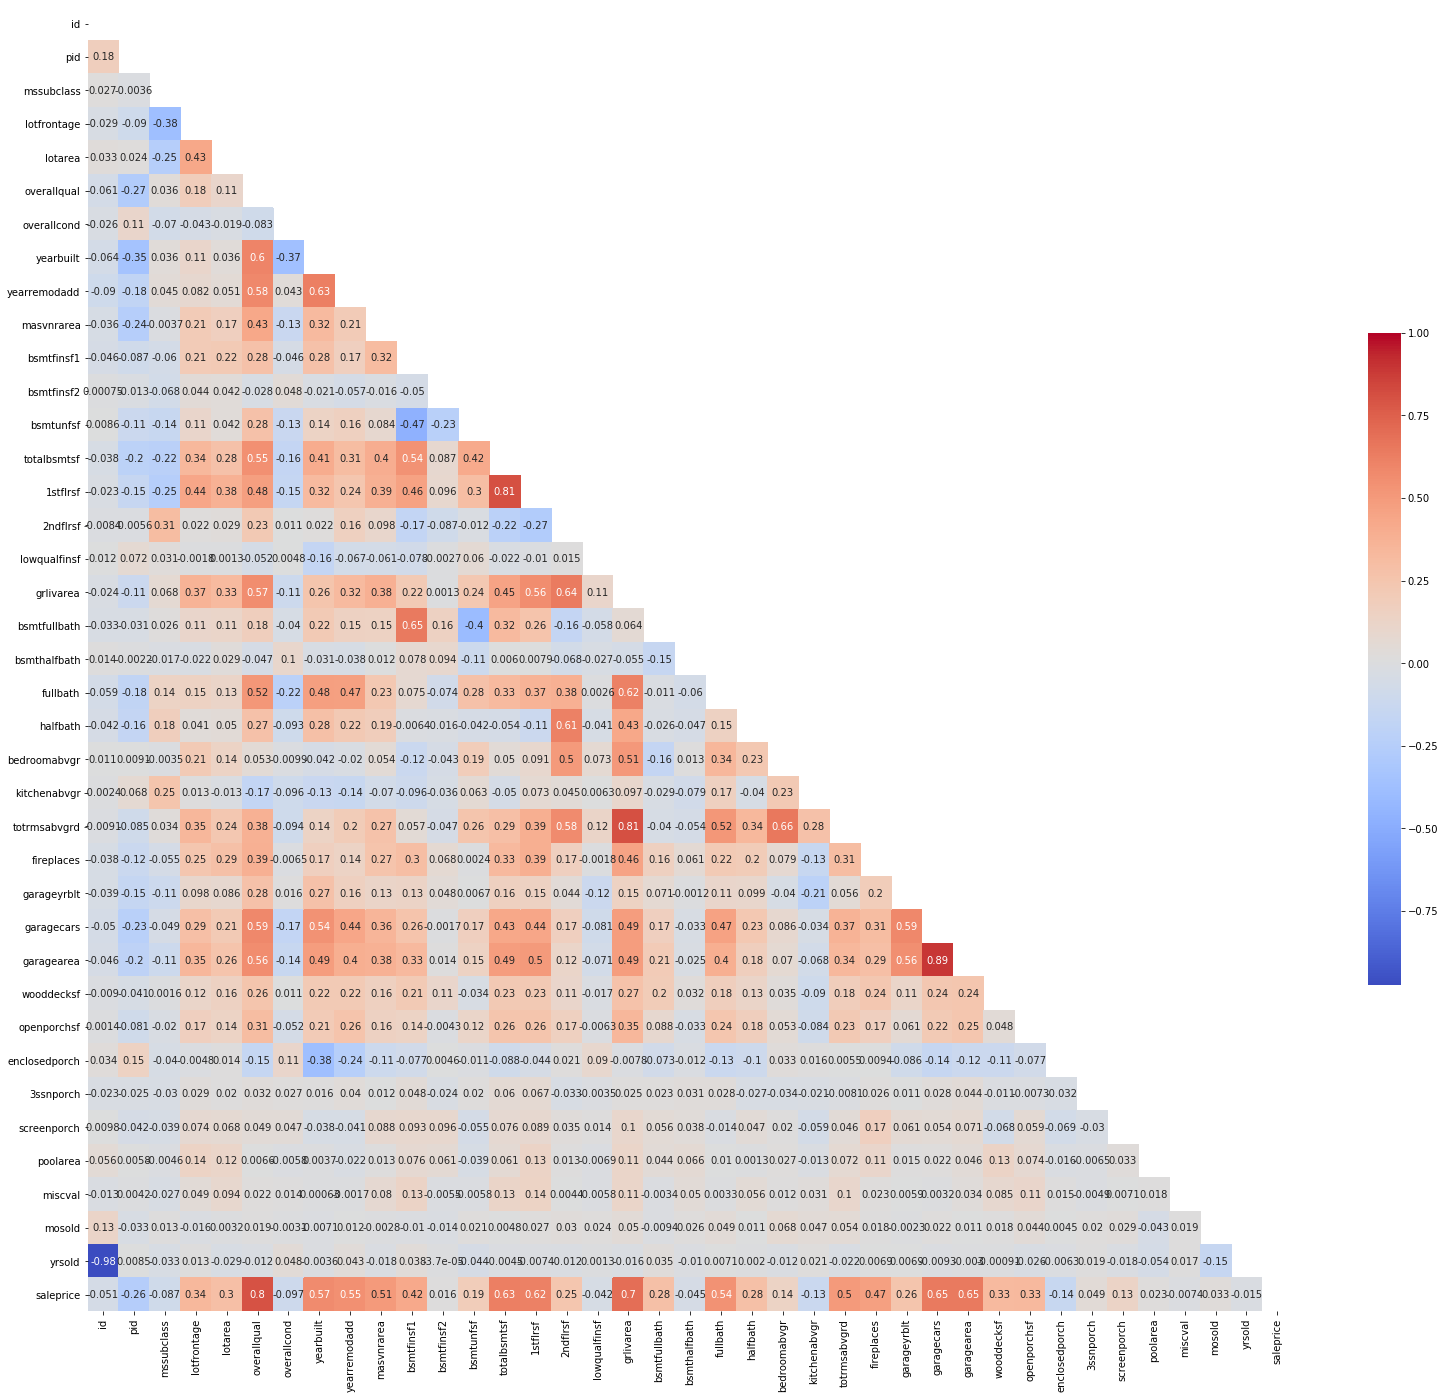

In [59]:
#creating heatmap
plt.figure(figsize = (27,24))

mask = np.triu(np.ones_like(train_df.corr(), dtype=np.bool))

sns.heatmap(train[['id','pid','mssubclass','lotfrontage','lotarea','overallqual','overallcond','yearbuilt','yearremodadd','masvnrarea','bsmtfinsf1','bsmtfinsf2','bsmtunfsf','totalbsmtsf','1stflrsf','2ndflrsf','lowqualfinsf','grlivarea','bsmtfullbath','bsmthalfbath','fullbath','halfbath','bedroomabvgr','kitchenabvgr','totrmsabvgrd','fireplaces','garageyrblt','garagecars','garagearea','wooddecksf','openporchsf','enclosedporch','3ssnporch','screenporch','poolarea','miscval','mosold','yrsold','saleprice']].corr(),  mask=mask, annot=True, cmap="coolwarm", cbar_kws={"shrink": .5});

##### Scatterplot for numerical values

* Spotting for outliers: 1stflrsf, grlivarea, lotarea

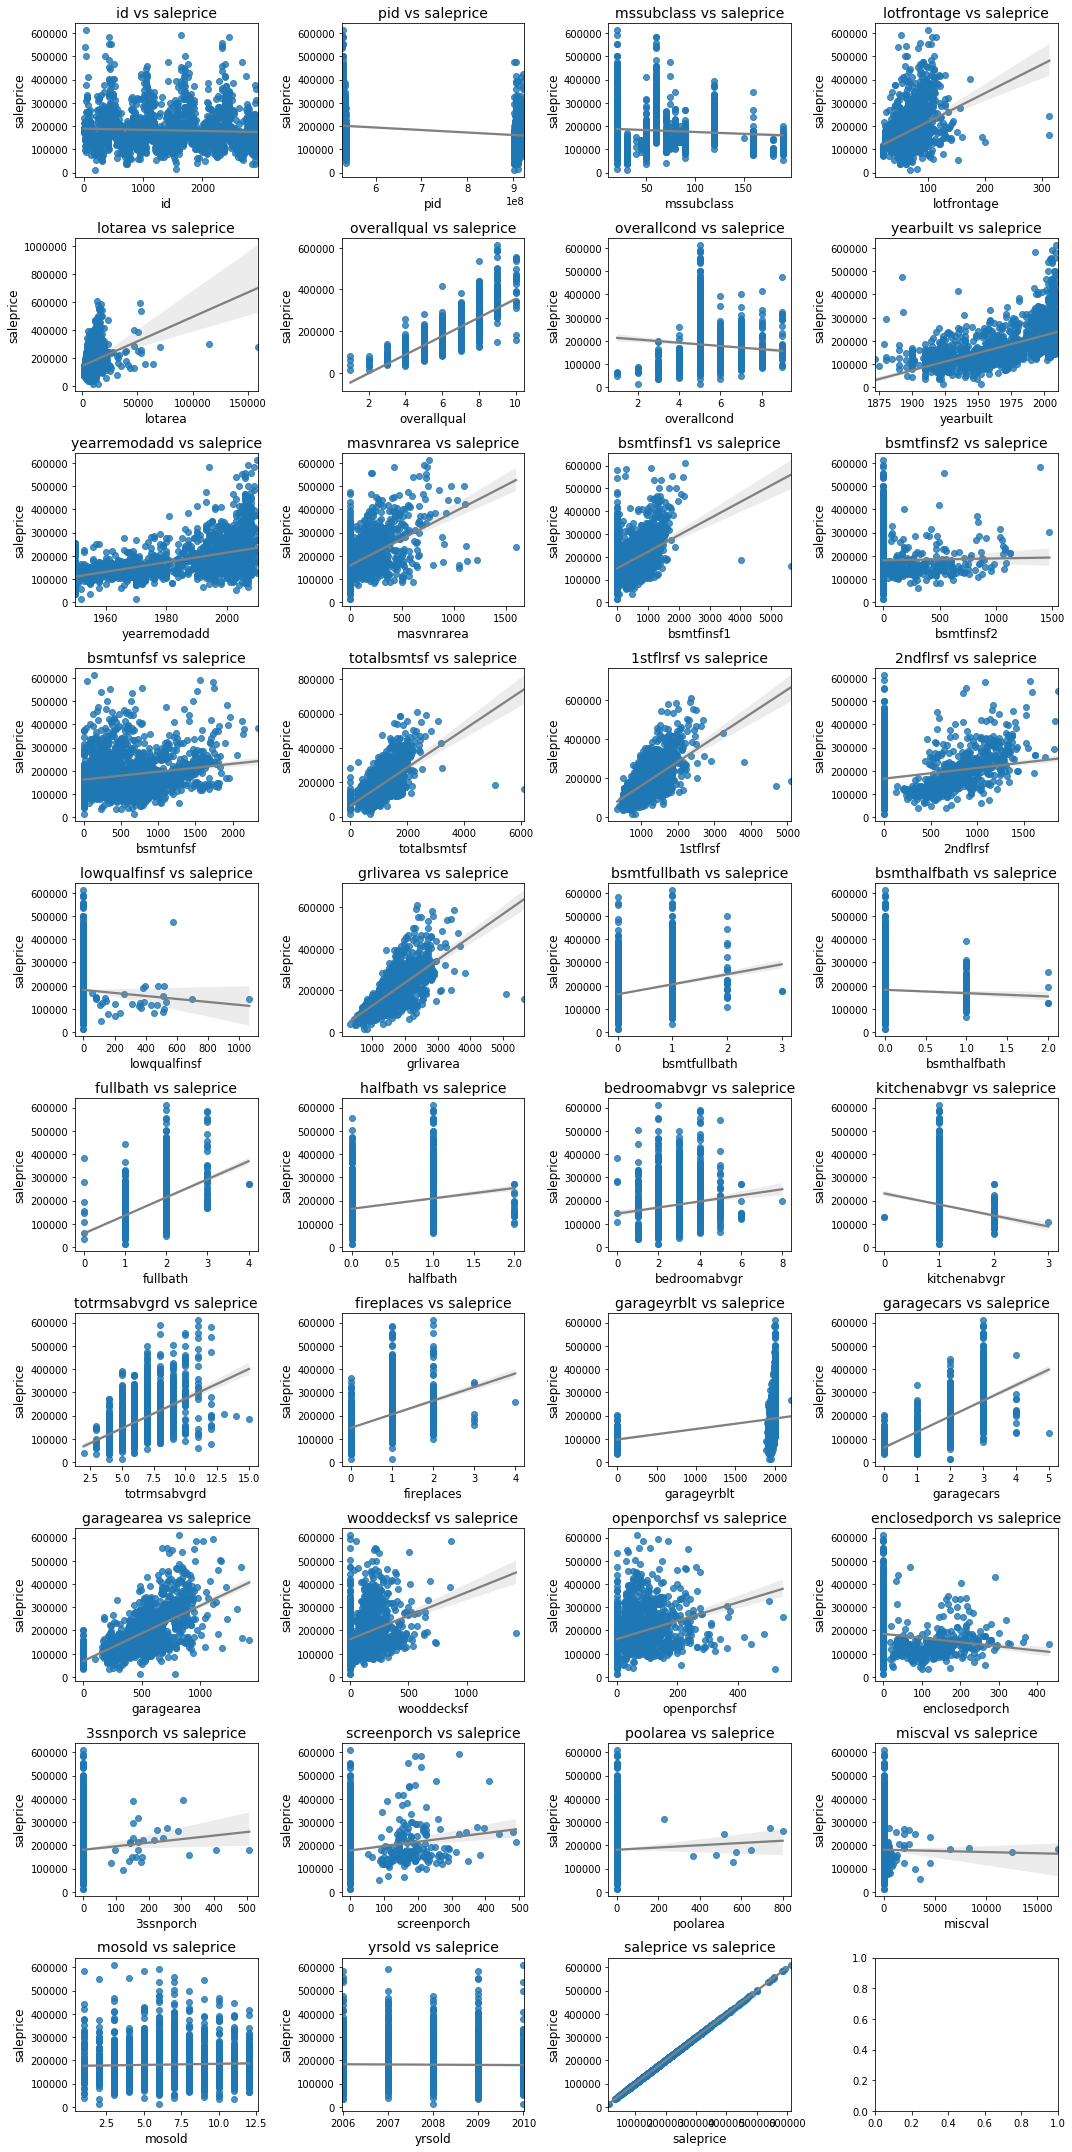

In [60]:
#creating scatterplot function for scatterplot graphs
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(x=dataframe[column],y=dataframe['saleprice'], ax=ax[i], line_kws = {'color':'grey'})        
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].set_xlabel(column, fontsize=12)
        ax[i].set_ylabel('saleprice', fontsize=12)
    plt.tight_layout()
    
subplot_scatter(train, train_num)

##### Boxplot for categories

In [61]:
#getting the categorical columns 
train_cat = [col for col in train.columns if col if train[col].dtype == np.object]

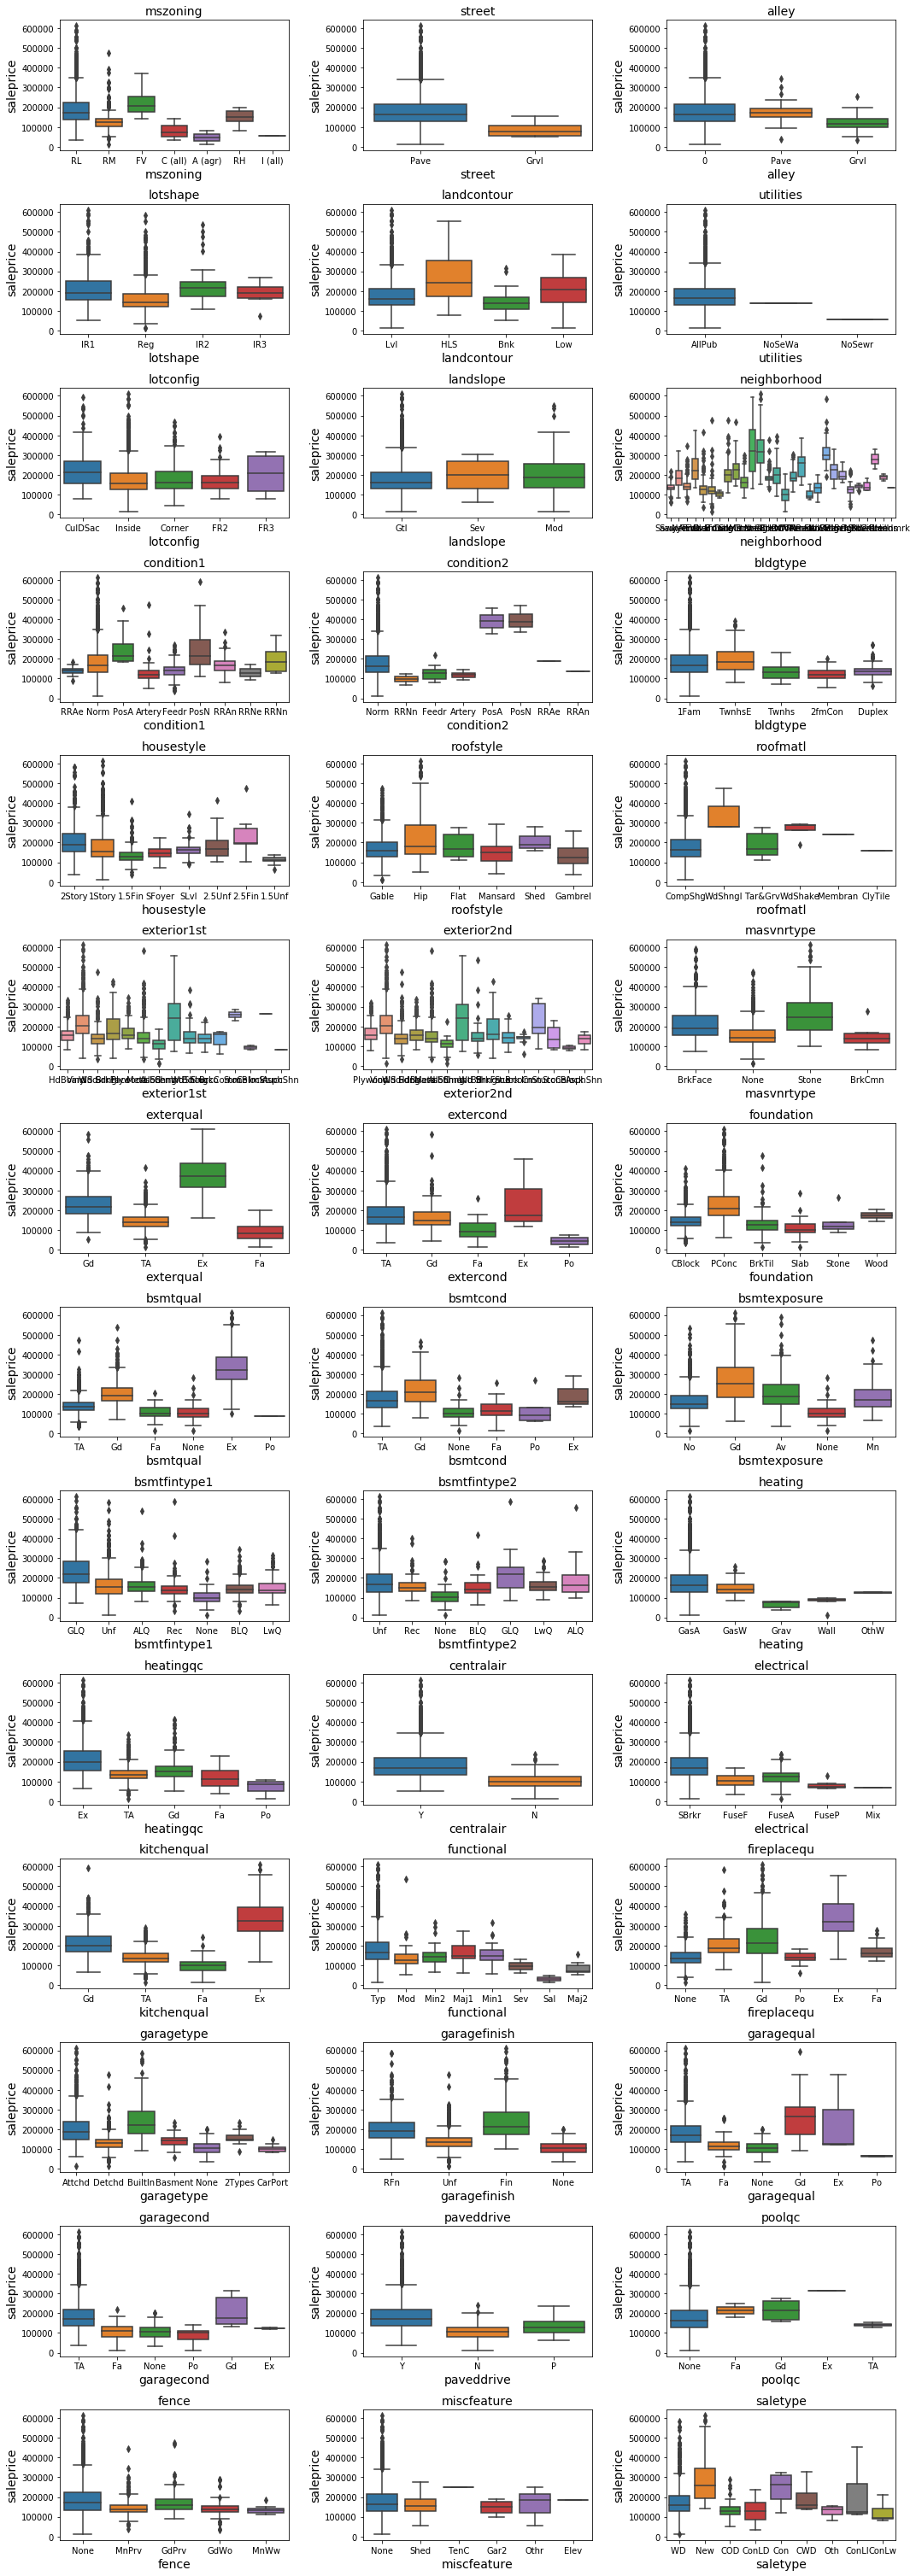

In [62]:
#defining function
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe['saleprice'], ax = ax[i])
        ax[i].set_title(column,fontsize=14)  
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

subplot_box(train, train_cat)

##### Barplots for categories

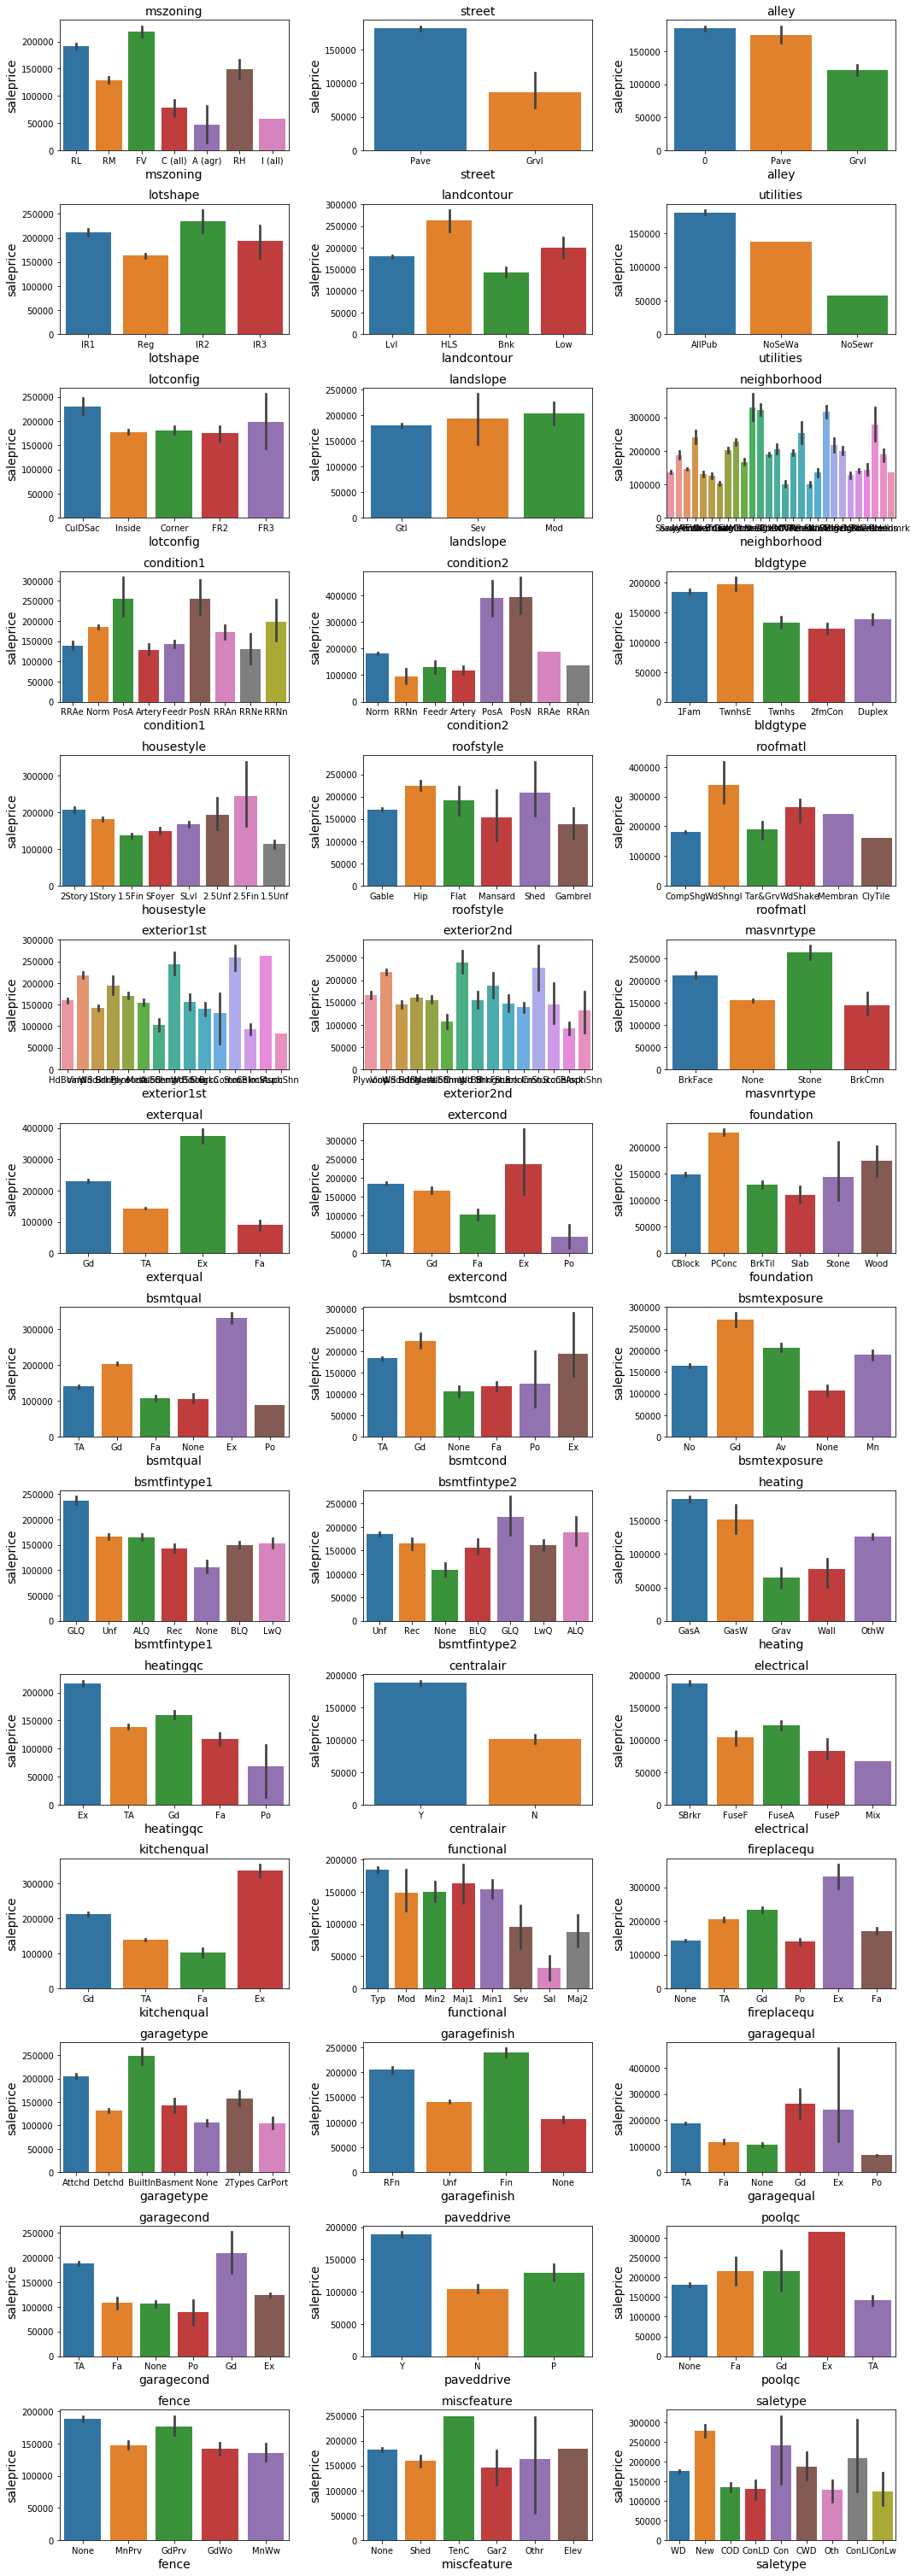

In [63]:
def draw_bars(df, variables, n_rows, n_cols):
    nrows = int(np.ceil(len(variables)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(variables): 
        sns.barplot(x = df[column], y = df['saleprice'], ax = ax[i])
        ax[i].set_title(column,fontsize=14)  
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
draw_bars(train, train_cat, int(len(train_cat)/2)+1, 2)

### Proposed Feature Engineering

#####  Dropping irrelevant  columns

In [64]:
#dropping IDs
train = train.drop(['pid','id'], axis=1)

#####  Searching for multi-collinearity

Searching for highly correlated variables and matching how related both of them are to saleprice (target variable), as well as each other

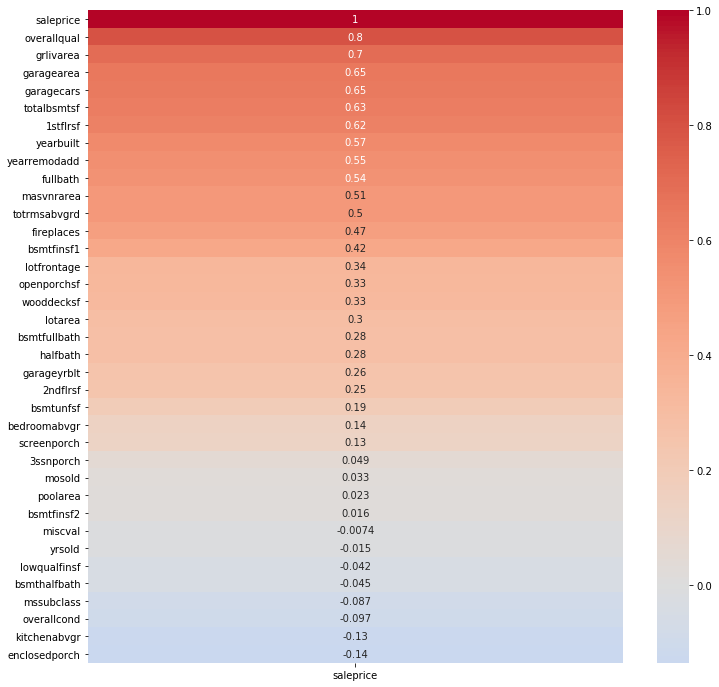

In [65]:
#shows the correlation with the target variable
figure = plt.figure(figsize=(12,12))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap='coolwarm', center=0);

In [66]:
## shows the correlation between each variable
corr_matrix = train.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol.head(10)

garagecars    garagearea      0.893442
grlivarea     totrmsabvgrd    0.813333
totalbsmtsf   1stflrsf        0.808351
overallqual   saleprice       0.800207
grlivarea     saleprice       0.697038
bedroomabvgr  totrmsabvgrd    0.655439
garagearea    saleprice       0.649897
garagecars    saleprice       0.647781
bsmtfinsf1    bsmtfullbath    0.645697
2ndflrsf      grlivarea       0.639092
dtype: float64

1. garagecars and garagearea share the same correlation with saleprice, and ~90% correlation with each other. I'd drop the garagecars index

In [67]:
train = train.drop(['garagecars'], axis=1)

2. totalbsmtsf and 1stflrsf have 80% correlation with each other and have very similar coefficients against the target variable "saleprice". totalbsmtsf will be kept as it has a higher correlation with y.


In [68]:
train = train.drop(['1stflrsf'], axis=1)

3. grlivarea and totrmsabvgrd have 81% correlation with each other. grlivarea will be kept as it has a higher correlation with y.

In [69]:
train = train.drop(['totrmsabvgrd'], axis=1)

#####  Nominal variables for OHE

In [70]:
train = pd.get_dummies(train, columns=['mssubclass','mszoning','street','alley','landcontour','lotconfig','neighborhood','condition1','condition2','bldgtype','housestyle','roofstyle','roofmatl','exterior1st','exterior2nd','masvnrtype','foundation','heating','centralair','garagetype','miscfeature','saletype'], drop_first=True)

In [71]:
#now we have 208 features
train.shape

(2051, 208)

##### Ordinal variables (to be mapped to numerical scale) 

Grouping features and dropping references along the way

1. lotshape

In [72]:
#lotshape
train['lotshape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lotshape, dtype: int64

In [73]:
train['lotshape'] = train['lotshape'].map({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

2. utilities

In [74]:
#utilities
train['utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

In [75]:
train['utilities'] = train['utilities'].apply(lambda x: 'fullpub' if x == 'AllPub' else 'missingpub')
train['utilities'].value_counts()

fullpub       2049
missingpub       2
Name: utilities, dtype: int64

In [76]:
#condense categories into two only: with all public utilities and incomplete utilities
train['utilities'] = train['utilities'].map({'missingpub':1,'fullpub':2})

3. slope

In [77]:
#landslope
train['landslope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: landslope, dtype: int64

In [78]:
train['landslope'] = train['landslope'].apply(lambda x: 'flat' if x == 'Gtl' else 'sloped')
train['landslope'].value_counts()

flat      1953
sloped      98
Name: landslope, dtype: int64

In [79]:
train['landslope'] = train['landslope'].map({'sloped':2,'flat':1})

4. exterqual

In [80]:
#exterqual
train['exterqual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exterqual, dtype: int64

In [81]:
train['exterqual'] = train['exterqual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1})

5. extercond

In [82]:
#extercond
train['extercond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: extercond, dtype: int64

In [83]:
train['extercond'] = train['extercond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

6. bsmtqual

In [84]:
#bsmtqual
train['bsmtqual'].value_counts()

TA      887
Gd      864
Ex      184
Fa       60
None     55
Po        1
Name: bsmtqual, dtype: int64

In [85]:
train['bsmtqual'] = train['bsmtqual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

7. bsmtcond

In [86]:
#bsmtcond
train['bsmtcond'].value_counts()

TA      1834
Gd        89
Fa        65
None      55
Po         5
Ex         3
Name: bsmtcond, dtype: int64

In [87]:
train['bsmtcond'] = train['bsmtcond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

8. bsmtexposure

In [88]:
#bsmtexposure
train['bsmtexposure'].value_counts()

No      1342
Av       288
Gd       203
Mn       163
None      55
Name: bsmtexposure, dtype: int64

In [89]:
train['bsmtexposure'] = train['bsmtexposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

9. bsmtfintype1

In [90]:
#bsmtfintype1
train['bsmtfintype1'].value_counts()

GLQ     615
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     55
Name: bsmtfintype1, dtype: int64

In [91]:
train['bsmtfintype1'] = train['bsmtfintype1'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':0})

10. bsmtfintype2

In [92]:
#bsmtfintype2
train['bsmtfintype2'].value_counts()

Unf     1749
Rec       80
LwQ       60
None      56
BLQ       48
ALQ       35
GLQ       23
Name: bsmtfintype2, dtype: int64

In [93]:
train['bsmtfintype2'] = train['bsmtfintype2'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':0})

11. heatingqc

In [94]:
#heatingqc
train['heatingqc'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heatingqc, dtype: int64

In [95]:
train['heatingqc'] = train['heatingqc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

12. electrical

In [96]:
#electrical
train['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [97]:
train['electrical'] = train['electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3, 'FuseP':2, 'Mix':1})

13. kitchenqual

In [98]:
#kitchenqual
train['kitchenqual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchenqual, dtype: int64

In [99]:
train['kitchenqual'] = train['kitchenqual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1})

14. functional

In [100]:
#functional
train['functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: functional, dtype: int64

In [101]:
train['functional'] = train['functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})

15. fireplacequ

In [102]:
#fireplacequ
train['fireplacequ'].value_counts()

None    1000
Gd       523
TA       407
Fa        59
Ex        31
Po        31
Name: fireplacequ, dtype: int64

In [103]:
#Close to 50% missing. I will hold this variable to test if it will affect the model predictable
1000/train.shape[0]

0.48756704046806437

In [104]:
train['fireplacequ'] = train['fireplacequ'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

16. garagefinish

In [105]:
#garagefinish
train['garagefinish'].value_counts()

Unf     849
RFn     579
Fin     509
None    114
Name: garagefinish, dtype: int64

In [106]:
train['garagefinish'] = train['garagefinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

17. garagequal

In [107]:
#garagequal
train['garagequal'].value_counts()

TA      1832
None     114
Fa        82
Gd        18
Ex         3
Po         2
Name: garagequal, dtype: int64

In [108]:
train['garagequal'] = train['garagequal'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

18. garagecond

In [109]:
#garagecond
train['garagecond'].value_counts()

TA      1868
None     114
Fa        47
Gd        12
Po         8
Ex         2
Name: garagecond, dtype: int64

In [110]:
train['garagecond'] = train['garagecond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

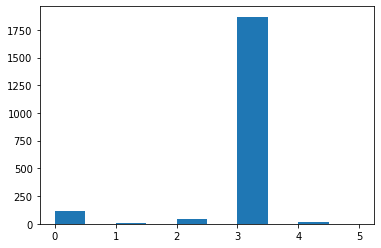

In [111]:
plt.hist(train['garagecond']);

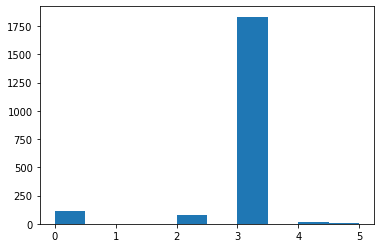

In [112]:
plt.hist(train['garagequal']);

It appears that the distribution and values of garagequal and garagecond are similar, thus, we will keep garagequal only.

In [113]:
train.drop('garagecond',axis=1,inplace=True)

19. paveddrive

In [114]:
#paveddrive
train['paveddrive'].value_counts()

Y    1861
N     151
P      39
Name: paveddrive, dtype: int64

In [115]:
train['paveddrive'] = train['paveddrive'].apply(lambda x: 'Paved' if x == 'Y' else 'Nonpaved')
train['paveddrive'].value_counts()

Paved       1861
Nonpaved     190
Name: paveddrive, dtype: int64

In [116]:
train['paveddrive'] = train['paveddrive'].map({'Paved':2,'Nonpaved':1})

20. poolqc

In [117]:
#poolqc
train['poolqc'].value_counts()

None    2042
Gd         4
Fa         2
TA         2
Ex         1
Name: poolqc, dtype: int64

In [118]:
#more than 99% counts is missing. I've decided to drop this feature
2042/train.shape[0]

0.9956118966357874

In [119]:
train.drop('poolqc',axis=1,inplace=True)

21. fence

In [120]:
#fence
train['fence'].value_counts()

None     1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [121]:
#more than 1651 counts is missing. I've decided to drop this feature
1651/train.shape[0]

0.8049731838127743

In [122]:
train.drop('fence',axis=1,inplace=True)

##### Creating new variables

1. Season

In [123]:
#Creates variable for season of sale from month of sale variable
seasons = {
    'Spring':[3,4,5],
    'Summer':[6,7,8],
    'Fall':[9,10,11],
    'Winter':[12,1,2]}

train['season'] = train['mosold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])

#Gets dummies for season of sale
train = pd.get_dummies(train, columns=['season'],drop_first=True)

In [124]:
train.drop('mosold',axis=1,inplace=True)

2. Age

In [125]:
#create function to calculate age
def ageyears(feature): 
    return feature.apply(lambda x: 0 if x==0 else (2020 - x))

#create new columns to calculate age variables
train['houseage'] = ageyears(train.yearbuilt)
train['remodage'] = ageyears(train.yearremodadd)
train['garageage'] = ageyears(train.garageyrblt) 

In [126]:
train.drop('yearbuilt',axis=1,inplace=True)

In [127]:
train.drop('yearremodadd',axis=1,inplace=True)

In [128]:
train.drop('garageyrblt',axis=1,inplace=True)

3. Generate Polynomial Features

##### Feature Elimination/ Check for multicollinearity (Round 2)

Creating a heatmap 

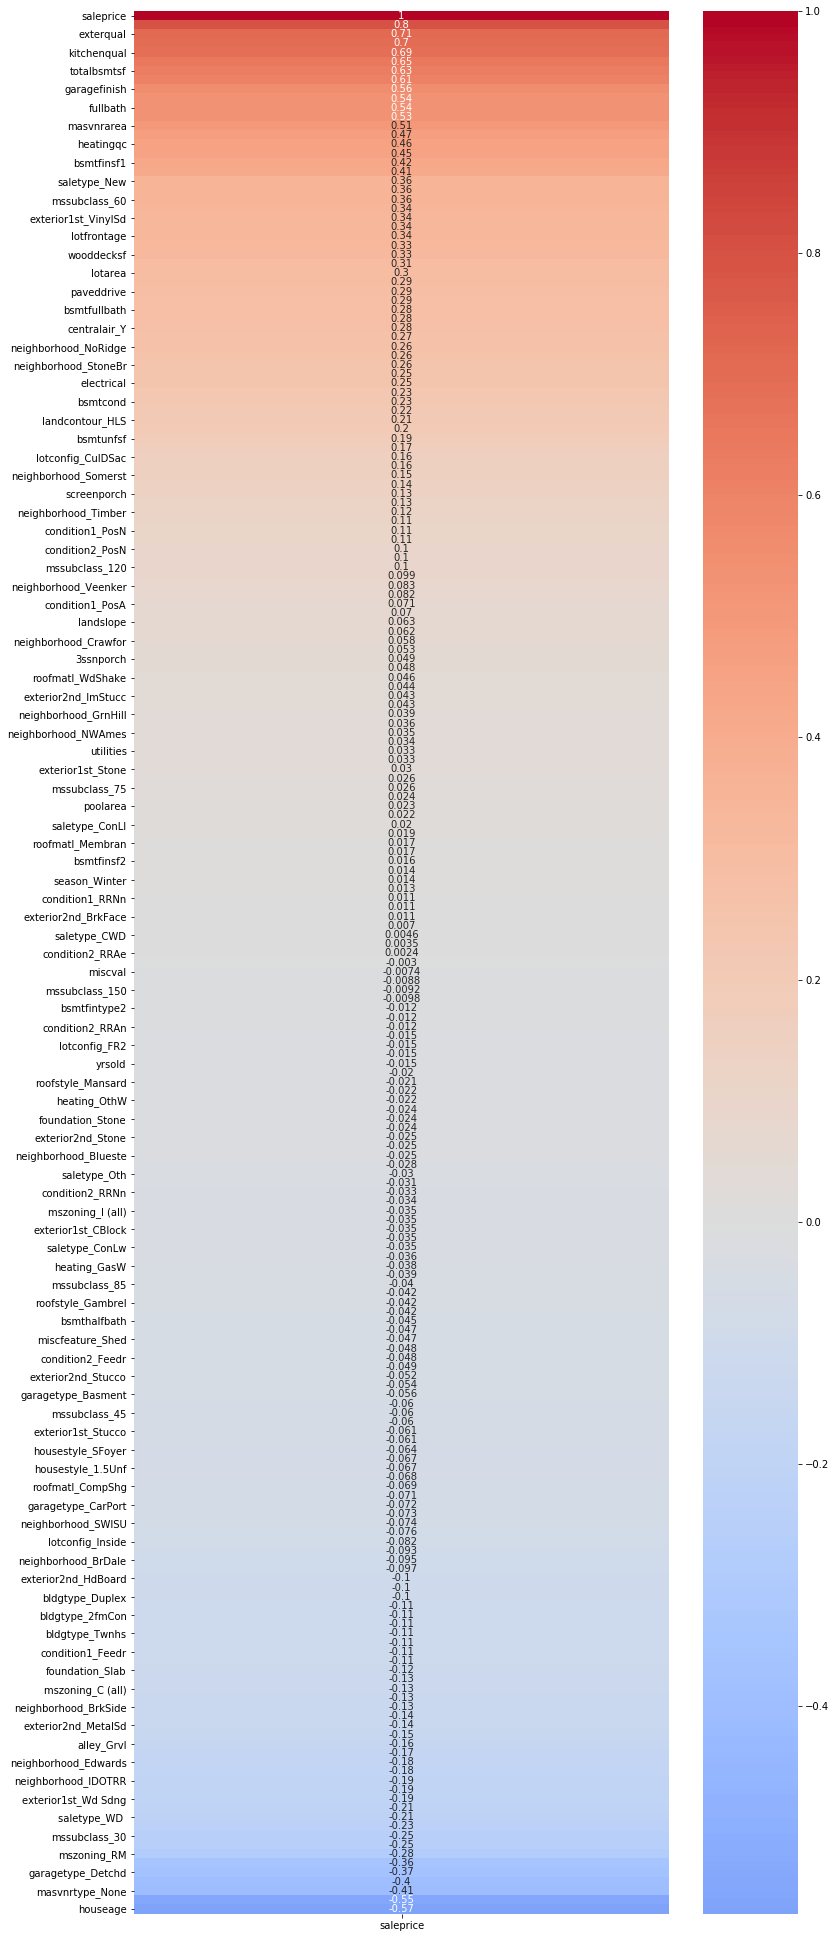

In [129]:
#shows the correlation with the target variable
figure = plt.figure(figsize=(12,35))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap='coolwarm', center=0);

Seperating Target and Feature Variables

In [130]:
y = train['saleprice']

In [131]:
X = train.drop(['saleprice'], axis=1)

In [132]:
corr_matrix = X.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol.head(10)

mssubclass_90        bldgtype_Duplex        1.000000
exterior1st_CemntBd  exterior2nd_CmentBd    0.988379
mssubclass_190       bldgtype_2fmCon        0.977762
exterior1st_VinylSd  exterior2nd_VinylSd    0.977569
exterior1st_MetalSd  exterior2nd_MetalSd    0.976461
mssubclass_80        housestyle_SLvl        0.954552
roofstyle_Gable      roofstyle_Hip          0.948438
garagequal           garagetype_None        0.938658
miscfeature_None     miscfeature_Shed       0.926095
exterior1st_HdBoard  exterior2nd_HdBoard    0.885877
dtype: float64

In [133]:
top_100_feats = list(abs(X.corrwith(y)).sort_values(ascending=False)[:-100].index)

In [134]:
top_100_feats

['overallqual',
 'exterqual',
 'grlivarea',
 'kitchenqual',
 'garagearea',
 'totalbsmtsf',
 'bsmtqual',
 'houseage',
 'garagefinish',
 'remodage',
 'fireplacequ',
 'fullbath',
 'foundation_PConc',
 'masvnrarea',
 'fireplaces',
 'heatingqc',
 'neighborhood_NridgHt',
 'bsmtfinsf1',
 'bsmtexposure',
 'masvnrtype_None',
 'garageage',
 'garagetype_Detchd',
 'saletype_New',
 'garagetype_Attchd',
 'foundation_CBlock',
 'mssubclass_60',
 'bsmtfintype1',
 'exterior1st_VinylSd',
 'exterior2nd_VinylSd',
 'lotfrontage',
 'openporchsf',
 'wooddecksf',
 'masvnrtype_Stone',
 'lotarea',
 'lotshape',
 'paveddrive',
 'garagequal',
 'bsmtfullbath',
 'halfbath',
 'mszoning_RM',
 'centralair_Y',
 'roofstyle_Hip',
 'neighborhood_NoRidge',
 'masvnrtype_BrkFace',
 'neighborhood_StoneBr',
 'roofstyle_Gable',
 'mssubclass_30',
 '2ndflrsf',
 'electrical',
 'mszoning_RL',
 'garagetype_None',
 'bsmtcond',
 'garagetype_BuiltIn',
 'saletype_WD ',
 'landcontour_HLS',
 'neighborhood_OldTown',
 'housestyle_2Story',
 'e

#### Remove outliers

1. grlivarea

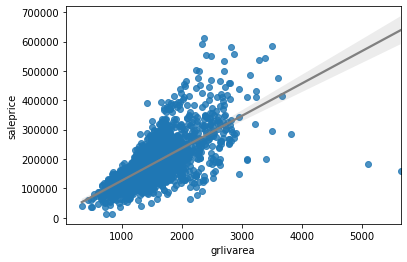

In [135]:
sns.regplot(x=train['grlivarea'],y=train['saleprice'], line_kws = {'color':'grey'});

In [136]:
train = train[(train.grlivarea < 5000)]

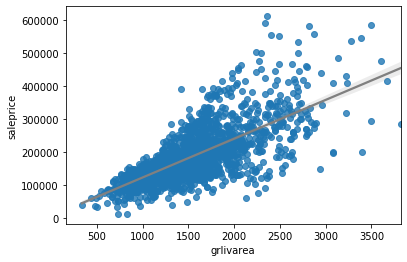

In [137]:
sns.regplot(x=train['grlivarea'],y=train['saleprice'], line_kws = {'color':'grey'});

In [138]:
train.shape

(2049, 207)

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Columns: 207 entries, lotfrontage to garageage
dtypes: float64(10), int64(40), uint8(157)
memory usage: 1.1 MB


### Modifying the test dataset

##### Rename columns for easy modification

In [140]:
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '').str.replace('/', '')

##### Treating null values

In [141]:
test.isnull().sum().sort_values(ascending=False).head(50)

poolqc          875
miscfeature     838
alley           821
fence           707
fireplacequ     422
lotfrontage     160
garagecond       45
garagequal       45
garageyrblt      45
garagefinish     45
garagetype       44
bsmtexposure     25
bsmtfintype1     25
bsmtqual         25
bsmtfintype2     25
bsmtcond         25
masvnrarea        1
masvnrtype        1
electrical        1
overallcond       0
exterqual         0
extercond         0
foundation        0
exterior2nd       0
exterior1st       0
roofmatl          0
roofstyle         0
yearremodadd      0
yearbuilt         0
saletype          0
overallqual       0
housestyle        0
bldgtype          0
condition2        0
condition1        0
landslope         0
lotconfig         0
utilities         0
landcontour       0
lotshape          0
street            0
lotarea           0
mszoning          0
mssubclass        0
pid               0
neighborhood      0
totalbsmtsf       0
bsmtfinsf1        0
kitchenqual       0
mosold            0


In [142]:
test.loc[(test.fireplaces==0) & (test.fireplacequ.isnull()), ['fireplacequ']] = 'None'

In [143]:
test.fireplaces.isnull().sum()

0

In [144]:
test.masvnrarea = test.masvnrarea.fillna(0)

In [145]:
test.masvnrtype = test.masvnrtype.fillna('None')

In [146]:
test.masvnrtype.isnull().sum()

0

In [147]:
test.loc[(test.poolarea==0) & (test.poolqc.isnull()), ['poolqc']] = 'None'

In [148]:
test.poolqc.isnull().sum()

0

In [149]:
test['lotfrontage'] = test.apply(lambda x: neighborhood_means[x['neighborhood']] if np.isnan(x['lotfrontage']) else x['lotfrontage'], axis=1)

In [150]:
test.lotfrontage.isnull().sum()

0

In [151]:
test['garagetype'] = test['garagetype'].fillna('None')
test['garagefinish'] = test['garagefinish'].fillna('None')
test['garagequal'] = test['garagequal'].fillna('None')
test['garagecond'] = test['garagecond'].fillna('None')
test['garageyrblt'] = test['garageyrblt'].fillna(0)
test['garagearea'] = test['garagearea'].fillna(0)
test['garagecars'] = test['garagecars'].fillna(0)

In [152]:
test[['garagearea','garagetype', 'garagequal', 'garagecars','garageyrblt','garagefinish','garagecond']].isnull().sum()

garagearea      0
garagetype      0
garagequal      0
garagecars      0
garageyrblt     0
garagefinish    0
garagecond      0
dtype: int64

In [153]:
for i in ['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']:
    test[i] = test[i].fillna('None')

In [154]:
test[['bsmtexposure','bsmtfintype2', 'bsmtcond', 'bsmtfintype1','bsmtqual']].isnull().sum()

bsmtexposure    0
bsmtfintype2    0
bsmtcond        0
bsmtfintype1    0
bsmtqual        0
dtype: int64

In [155]:
test['alley'] = test['alley'].fillna(0)

In [156]:
test['fence'] = test['fence'].fillna('None')

In [157]:
test['miscfeature']= test['miscfeature'].fillna('None')

In [158]:
test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [159]:
test.loc[(test.electrical.isnull())]

id        pid  mssubclass mszoning  lotfrontage  lotarea street alley  \
635  1578  916386080          80       RL         73.0     9735   Pave     0   

    lotshape landcontour utilities lotconfig landslope neighborhood  \
635      Reg         Lvl    AllPub    Inside       Gtl       Timber   

    condition1 condition2 bldgtype housestyle  overallqual  overallcond  \
635       Norm       Norm     1Fam       SLvl            5            5   

     yearbuilt  yearremodadd roofstyle roofmatl exterior1st exterior2nd  \
635       2006          2007     Gable  CompShg     VinylSd     VinylSd   

    masvnrtype  masvnrarea exterqual extercond foundation bsmtqual bsmtcond  \
635       None         0.0        TA        TA      PConc       Gd       TA   

    bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  bsmtfinsf2  bsmtunfsf  \
635           No          Unf           0          Unf           0        384   

     totalbsmtsf heating heatingqc centralair electrical  1stflrsf  2ndflrsf  \
635          384    GasA        Gd          Y        NaN       754       640   

     lowqualfinsf  grlivarea  bsmtfullbath  bsmthalfbath  fullbath  halfbath  \
635             0       1394             0             0         2         1   

     bedroomabvgr  kitchenabvgr kitchenqual  totrmsabvgrd functional  \
635             3             1          Gd             7        Typ   

     fireplaces fireplacequ garagetype  garageyrblt garagefinish  garagecars  \
635           0        None    BuiltIn       2007.0          Fin           2   

     garagearea garagequal garagecond paveddrive  wooddecksf  openporchsf  \
635         400         TA         TA          Y         100            0   

     enclosedporch  3ssnporch  screenporch  poolarea poolqc fence miscfeature  \
635              0          0            0         0   None  None        None   

     miscval  mosold  yrsold saletype  
635        0       5    2008      WD

In [160]:
test.at[635, 'electrical'] = 'SBrkr'

In [161]:
test['electrical'].isnull().sum()

0

In [162]:
test.loc[(test.kitchenqual.isnull())]

Empty DataFrame
Columns: [id, pid, mssubclass, mszoning, lotfrontage, lotarea, street, alley, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremodadd, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrtype, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, fireplacequ, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, poolqc, fence, miscfeature, miscval, mosold, yrsold, saletype]
Index: []

In [163]:
test['kitchenqual'].mode()

0    TA
dtype: object

In [164]:
test.at[363, 'kitchenqual'] = 'TA'

##### Dropping other same columns as train set

In [165]:
test = test.drop(['pid'], axis=1)

In [166]:
test = test.drop(['garagecars'], axis=1)

In [167]:
test = test.drop(['1stflrsf'], axis=1)

In [168]:
test = test.drop(['totrmsabvgrd'], axis=1)

##### Ordinal variables (to be mapped to numerical scale) 

In [169]:
test['lotshape'] = test['lotshape'].map({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

In [170]:
test['utilities'] = test['utilities'].apply(lambda x: 'fullpub' if x == 'AllPub' else 'missingpub')
test['utilities'] = test['utilities'].map({'missingpub':1,'fullpub':2})

In [171]:
test['landslope'] = test['landslope'].apply(lambda x: 'flat' if x == 'Gtl' else 'sloped')
test['landslope'] = test['landslope'].map({'sloped':2,'flat':1})

In [172]:
test['exterqual'] = test['exterqual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1})

In [173]:
test['extercond'] = test['extercond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [174]:
test['bsmtqual'] = test['bsmtqual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

In [175]:
test['bsmtcond'] = test['bsmtcond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

In [176]:
test['bsmtexposure'] = test['bsmtexposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

In [177]:
test['bsmtfintype1'] = test['bsmtfintype1'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':0})

In [178]:
test['bsmtfintype2'] = test['bsmtfintype2'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':0})

In [179]:
test['heatingqc'] = test['heatingqc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [180]:
test['electrical'] = test['electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3, 'FuseP':2, 'Mix':1})

In [181]:
test['kitchenqual'] = test['kitchenqual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1})

In [182]:
test['functional'] = test['functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})

In [183]:
test['fireplacequ'] = test['fireplacequ'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

In [184]:
test['garagefinish'] = test['garagefinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

In [185]:
test['garagequal'] = test['garagequal'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

In [186]:
test['paveddrive'] = test['paveddrive'].apply(lambda x: 'Paved' if x == 'Y' else 'Nonpaved')
test['paveddrive'] = test['paveddrive'].map({'Paved':2,'Nonpaved':1})

In [187]:
test.drop('garagecond',axis=1,inplace=True)

In [188]:
test.drop('poolqc',axis=1,inplace=True)

In [189]:
test.drop('fence',axis=1,inplace=True)

##### Creating new variables

In [190]:
#Creates variable for season of sale from month of sale variable
seasons = {
    'Spring':[3,4,5],
    'Summer':[6,7,8],
    'Fall':[9,10,11],
    'Winter':[12,1,2]}

test['season'] = test['mosold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])

#Gets dummies for season of sale
test = pd.get_dummies(test, columns=['season'],drop_first=True)

#drop mosold
test.drop('mosold',axis=1,inplace=True)

In [191]:
#create function to calculate age
def ageyears(feature): 
    return feature.apply(lambda x: 0 if x==0 else (2020 - x))

#create new columns to calculate age variables
test['houseage'] = ageyears(test.yearbuilt)
test['remodage'] = ageyears(test.yearremodadd)
test['garageage'] = ageyears(test.garageyrblt) 

In [192]:
test.drop('yearbuilt',axis=1,inplace=True)

In [193]:
test.drop('yearremodadd',axis=1,inplace=True)

In [194]:
test.drop('garageyrblt',axis=1,inplace=True)

#####  Nominal variables for OHE

In [195]:
test = pd.get_dummies(test, columns=['mssubclass','mszoning','street','alley','landcontour','lotconfig','neighborhood','condition1','condition2','bldgtype','housestyle','roofstyle','roofmatl','exterior1st','exterior2nd','masvnrtype','foundation','heating','centralair','garagetype','miscfeature','saletype'], drop_first=True)

In [196]:
df = train.columns.intersection(test.columns)

In [197]:
test_list=[]
for i in test.columns:
    if i not in df:
        test_list.append(i)
        
test_list

['roofmatl_Metal',
 'roofmatl_Roll',
 'exterior1st_PreCast',
 'exterior2nd_Other',
 'exterior2nd_PreCast',
 'masvnrtype_CBlock',
 'heating_GasA',
 'saletype_VWD']

In [198]:
train_list=[]
for i in train.columns:
    if i not in df and i != 'saleprice':
        train_list.append(i)
        
train_list

['mssubclass_150',
 'mszoning_C (all)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition2_Feedr',
 'condition2_RRAe',
 'condition2_RRAn',
 'condition2_RRNn',
 'roofmatl_CompShg',
 'roofmatl_Membran',
 'exterior1st_CBlock',
 'exterior1st_ImStucc',
 'exterior1st_Stone',
 'exterior2nd_Stone',
 'heating_OthW',
 'heating_Wall',
 'miscfeature_Gar2',
 'miscfeature_TenC']

In [199]:
test.drop(test_list,axis=1,inplace=True)

In [200]:
train.drop(train_list,axis=1,inplace=True)

##### Checking of test data set

In [201]:
X_features = train.drop(['saleprice','id'], axis=1)

In [202]:
len(X_features.columns)

188

In [203]:
list(X_features.columns)

['lotfrontage',
 'lotarea',
 'lotshape',
 'utilities',
 'landslope',
 'overallqual',
 'overallcond',
 'masvnrarea',
 'exterqual',
 'extercond',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'heatingqc',
 'electrical',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'kitchenqual',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garagefinish',
 'garagearea',
 'garagequal',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'yrsold',
 'mssubclass_30',
 'mssubclass_40',
 'mssubclass_45',
 'mssubclass_50',
 'mssubclass_60',
 'mssubclass_70',
 'mssubclass_75',
 'mssubclass_80',
 'mssubclass_85',
 'mssubclass_90',
 'mssubclass_120',
 'mssubclass_160',
 'mssubclass_180',
 'mssubclass_190',
 'mszoning_FV',
 'mszoning_I (all)',
 'mszoning_RH',
 'ms

In [204]:
test = test[['lotfrontage',
 'lotarea',
 'lotshape',
 'utilities',
 'landslope',
 'overallqual',
 'overallcond',
 'masvnrarea',
 'exterqual',
 'extercond',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'heatingqc',
 'electrical',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'kitchenqual',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garagefinish',
 'garagearea',
 'garagequal',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'yrsold',
 'mssubclass_30',
 'mssubclass_40',
 'mssubclass_45',
 'mssubclass_50',
 'mssubclass_60',
 'mssubclass_70',
 'mssubclass_75',
 'mssubclass_80',
 'mssubclass_85',
 'mssubclass_90',
 'mssubclass_120',
 'mssubclass_160',
 'mssubclass_180',
 'mssubclass_190',
 'mszoning_FV',
 'mszoning_I (all)',
 'mszoning_RH',
 'mszoning_RL',
 'mszoning_RM',
 'street_Pave',
 'alley_Grvl',
 'alley_Pave',
 'landcontour_HLS',
 'landcontour_Low',
 'landcontour_Lvl',
 'lotconfig_CulDSac',
 'lotconfig_FR2',
 'lotconfig_FR3',
 'lotconfig_Inside',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'condition1_Feedr',
 'condition1_Norm',
 'condition1_PosA',
 'condition1_PosN',
 'condition1_RRAe',
 'condition1_RRAn',
 'condition1_RRNe',
 'condition1_RRNn',
 'condition2_Norm',
 'condition2_PosA',
 'condition2_PosN',
 'bldgtype_2fmCon',
 'bldgtype_Duplex',
 'bldgtype_Twnhs',
 'bldgtype_TwnhsE',
 'housestyle_1.5Unf',
 'housestyle_1Story',
 'housestyle_2.5Fin',
 'housestyle_2.5Unf',
 'housestyle_2Story',
 'housestyle_SFoyer',
 'housestyle_SLvl',
 'roofstyle_Gable',
 'roofstyle_Gambrel',
 'roofstyle_Hip',
 'roofstyle_Mansard',
 'roofstyle_Shed',
 'roofmatl_Tar&Grv',
 'roofmatl_WdShake',
 'roofmatl_WdShngl',
 'exterior1st_AsphShn',
 'exterior1st_BrkComm',
 'exterior1st_BrkFace',
 'exterior1st_CemntBd',
 'exterior1st_HdBoard',
 'exterior1st_MetalSd',
 'exterior1st_Plywood',
 'exterior1st_Stucco',
 'exterior1st_VinylSd',
 'exterior1st_Wd Sdng',
 'exterior1st_WdShing',
 'exterior2nd_AsphShn',
 'exterior2nd_Brk Cmn',
 'exterior2nd_BrkFace',
 'exterior2nd_CBlock',
 'exterior2nd_CmentBd',
 'exterior2nd_HdBoard',
 'exterior2nd_ImStucc',
 'exterior2nd_MetalSd',
 'exterior2nd_Plywood',
 'exterior2nd_Stucco',
 'exterior2nd_VinylSd',
 'exterior2nd_Wd Sdng',
 'exterior2nd_Wd Shng',
 'masvnrtype_BrkFace',
 'masvnrtype_None',
 'masvnrtype_Stone',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'heating_GasW',
 'heating_Grav',
 'centralair_Y',
 'garagetype_Attchd',
 'garagetype_Basment',
 'garagetype_BuiltIn',
 'garagetype_CarPort',
 'garagetype_Detchd',
 'garagetype_None',
 'miscfeature_None',
 'miscfeature_Othr',
 'miscfeature_Shed',
 'saletype_CWD',
 'saletype_Con',
 'saletype_ConLD',
 'saletype_ConLI',
 'saletype_ConLw',
 'saletype_New',
 'saletype_Oth',
 'saletype_WD ',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'houseage',
 'remodage',
 'garageage']]

In [205]:
X_features.head()

lotfrontage  lotarea  lotshape  utilities  landslope  overallqual  \
0    72.774648    13517         2          2          1            6   
1    43.000000    11492         2          2          1            7   
2    68.000000     7922         1          2          1            5   
3    73.000000     9802         1          2          1            5   
4    82.000000    14235         2          2          1            6   

   overallcond  masvnrarea  exterqual  extercond  bsmtqual  bsmtcond  \
0            8       289.0          3          3         3         3   
1            5       132.0          3          3         4         3   
2            7         0.0          2          4         3         3   
3            5         0.0          2          3         4         3   
4            8         0.0          2          3         2         4   

   bsmtexposure  bsmtfintype1  bsmtfinsf1  bsmtfintype2  bsmtfinsf2  \
0             0             5       533.0             0         0.0   
1             0             5       637.0             0         0.0   
2             0             5       731.0             0         0.0   
3             0             0         0.0             0         0.0   
4             0             0         0.0             0         0.0   

   bsmtunfsf  totalbsmtsf  heatingqc  electrical  2ndflrsf  lowqualfinsf  \
0      192.0        725.0          5           5       754             0   
1      276.0        913.0          5           5      1209             0   
2      326.0       1057.0          3           5         0             0   
3      384.0        384.0          4           5       700             0   
4      676.0        676.0          3           5       614             0   

   grlivarea  bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
0       1479           0.0           0.0         2         1             3   
1       2122           1.0           0.0         2         1             4   
2       1057           1.0           0.0         1         0             3   
3       1444           0.0           0.0         2         1             3   
4       1445           0.0           0.0         2         0             3   

   kitchenabvgr  kitchenqual  functional  fireplaces  fireplacequ  \
0             1            3           7           0            0   
1             1            3           7           1            3   
2             1            3           7           0            0   
3             1            2           7           0            0   
4             1            2           7           0            0   

   garagefinish  garagearea  garagequal  paveddrive  wooddecksf  openporchsf  \
0             2       475.0           3           2           0           44   
1             2       559.0           3           2           0           74   
2             1       246.0           3           2           0           52   
3             3       400.0           3           2         100            0   
4             1       484.0           3           1           0           59   

   enclosedporch  3ssnporch  screenporch  poolarea  miscval  yrsold  \
0              0          0            0         0        0    2010   
1              0          0            0         0        0    2009   
2              0          0            0         0        0    2010   
3              0          0            0         0        0    2010   
4              0          0            0         0        0    2010   

   mssubclass_30  mssubclass_40  mssubclass_45  mssubclass_50  mssubclass_60  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              0              0   
3              0              0              0              0              1   
4              0              0              0              1

In [206]:
test.head()

lotfrontage  lotarea  lotshape  utilities  landslope  overallqual  \
0    69.000000     9142         1          2          1            6   
1    72.774648     9662         2          2          1            5   
2    58.000000    17104         2          2          1            7   
3    60.000000     8520         1          2          1            5   
4    75.192453     9500         2          2          1            6   

   overallcond  masvnrarea  exterqual  extercond  bsmtqual  bsmtcond  \
0            8         0.0          2          2         2         3   
1            4         0.0          2          3         4         3   
2            5         0.0          3          3         4         4   
3            6         0.0          3          3         3         3   
4            5       247.0          2          3         4         3   

   bsmtexposure  bsmtfintype1  bsmtfinsf1  bsmtfintype2  bsmtfinsf2  \
0             0             0           0             0           0   
1             0             0           0             0           0   
2             2             5         554             0           0   
3             0             0           0             0           0   
4             0             3         609             0           0   

   bsmtunfsf  totalbsmtsf  heatingqc  electrical  2ndflrsf  lowqualfinsf  \
0       1020         1020          4           2      1020             0   
1       1967         1967          3           5         0             0   
2        100          654          5           5       832             0   
3        968          968          3           5         0             0   
4        785         1394          4           5         0             0   

   grlivarea  bsmtfullbath  bsmthalfbath  fullbath  halfbath  bedroomabvgr  \
0       1928             0             0         2         0             4   
1       1967             0             0         2         0             6   
2       1496             1             0         2         1             3   
3        968             0             0         1         0             2   
4       1394             1             0         1         1             3   

   kitchenabvgr  kitchenqual  functional  fireplaces  fireplacequ  \
0             2            1           7           0            0   
1             2            2           7           0            0   
2             1            3           7           1            4   
3             1            2           7           0            0   
4             1            2           7           2            4   

   garagefinish  garagearea  garagequal  paveddrive  wooddecksf  openporchsf  \
0             1         440           1           2           0           60   
1             3         580           3           2         170            0   
2             2         426           3           2         100           24   
3             1         480           2           1           0            0   
4             2         514           3           2           0           76   

   enclosedporch  3ssnporch  screenporch  poolarea  miscval  yrsold  \
0            112          0            0         0        0    2006   
1              0          0            0         0        0    2006   
2              0          0            0         0        0    2006   
3            184          0            0         0        0    2007   
4              0          0          185         0        0    2009   

   mssubclass_30  mssubclass_40  mssubclass_45  mssubclass_50  mssubclass_60  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              1              0              0              0              0   
4              0              0              0              0

In [207]:
len(X_features.columns)

188

In [208]:
len(test.columns)

188

In [209]:
X_features.isnull().sum().sort_values(ascending=False)

garageage               0
mssubclass_180          0
alley_Pave              0
alley_Grvl              0
street_Pave             0
mszoning_RM             0
mszoning_RL             0
mszoning_RH             0
mszoning_I (all)        0
mszoning_FV             0
mssubclass_190          0
mssubclass_160          0
landcontour_Low         0
mssubclass_120          0
mssubclass_90           0
mssubclass_85           0
mssubclass_80           0
mssubclass_75           0
mssubclass_70           0
mssubclass_60           0
mssubclass_50           0
mssubclass_45           0
landcontour_HLS         0
landcontour_Lvl         0
remodage                0
neighborhood_Gilbert    0
neighborhood_NridgHt    0
neighborhood_NoRidge    0
neighborhood_NWAmes     0
neighborhood_NPkVill    0
neighborhood_NAmes      0
neighborhood_Mitchel    0
neighborhood_MeadowV    0
neighborhood_IDOTRR     0
neighborhood_Greens     0
neighborhood_Edwards    0
lotconfig_CulDSac       0
neighborhood_Crawfor    0
neighborhood

In [210]:
test.isnull().sum().sort_values(ascending=False)

garageage               0
mssubclass_180          0
alley_Pave              0
alley_Grvl              0
street_Pave             0
mszoning_RM             0
mszoning_RL             0
mszoning_RH             0
mszoning_I (all)        0
mszoning_FV             0
mssubclass_190          0
mssubclass_160          0
landcontour_Low         0
mssubclass_120          0
mssubclass_90           0
mssubclass_85           0
mssubclass_80           0
mssubclass_75           0
mssubclass_70           0
mssubclass_60           0
mssubclass_50           0
mssubclass_45           0
landcontour_HLS         0
landcontour_Lvl         0
remodage                0
neighborhood_Gilbert    0
neighborhood_NridgHt    0
neighborhood_NoRidge    0
neighborhood_NWAmes     0
neighborhood_NPkVill    0
neighborhood_NAmes      0
neighborhood_Mitchel    0
neighborhood_MeadowV    0
neighborhood_IDOTRR     0
neighborhood_Greens     0
neighborhood_Edwards    0
lotconfig_CulDSac       0
neighborhood_Crawfor    0
neighborhood

### Exporting processed datasets

In [211]:
#adding sale price back to train for export
train = train[['lotfrontage',
 'lotarea',
 'lotshape',
 'utilities',
 'landslope',
 'overallqual',
 'overallcond',
 'masvnrarea',
 'exterqual',
 'extercond',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'heatingqc',
 'electrical',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'kitchenqual',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garagefinish',
 'garagearea',
 'garagequal',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'yrsold',
 'mssubclass_30',
 'mssubclass_40',
 'mssubclass_45',
 'mssubclass_50',
 'mssubclass_60',
 'mssubclass_70',
 'mssubclass_75',
 'mssubclass_80',
 'mssubclass_85',
 'mssubclass_90',
 'mssubclass_120',
 'mssubclass_160',
 'mssubclass_180',
 'mssubclass_190',
 'mszoning_FV',
 'mszoning_I (all)',
 'mszoning_RH',
 'mszoning_RL',
 'mszoning_RM',
 'street_Pave',
 'alley_Grvl',
 'alley_Pave',
 'landcontour_HLS',
 'landcontour_Low',
 'landcontour_Lvl',
 'lotconfig_CulDSac',
 'lotconfig_FR2',
 'lotconfig_FR3',
 'lotconfig_Inside',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_IDOTRR',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber',
 'neighborhood_Veenker',
 'condition1_Feedr',
 'condition1_Norm',
 'condition1_PosA',
 'condition1_PosN',
 'condition1_RRAe',
 'condition1_RRAn',
 'condition1_RRNe',
 'condition1_RRNn',
 'condition2_Norm',
 'condition2_PosA',
 'condition2_PosN',
 'bldgtype_2fmCon',
 'bldgtype_Duplex',
 'bldgtype_Twnhs',
 'bldgtype_TwnhsE',
 'housestyle_1.5Unf',
 'housestyle_1Story',
 'housestyle_2.5Fin',
 'housestyle_2.5Unf',
 'housestyle_2Story',
 'housestyle_SFoyer',
 'housestyle_SLvl',
 'roofstyle_Gable',
 'roofstyle_Gambrel',
 'roofstyle_Hip',
 'roofstyle_Mansard',
 'roofstyle_Shed',
 'roofmatl_Tar&Grv',
 'roofmatl_WdShake',
 'roofmatl_WdShngl',
 'exterior1st_AsphShn',
 'exterior1st_BrkComm',
 'exterior1st_BrkFace',
 'exterior1st_CemntBd',
 'exterior1st_HdBoard',
 'exterior1st_MetalSd',
 'exterior1st_Plywood',
 'exterior1st_Stucco',
 'exterior1st_VinylSd',
 'exterior1st_Wd Sdng',
 'exterior1st_WdShing',
 'exterior2nd_AsphShn',
 'exterior2nd_Brk Cmn',
 'exterior2nd_BrkFace',
 'exterior2nd_CBlock',
 'exterior2nd_CmentBd',
 'exterior2nd_HdBoard',
 'exterior2nd_ImStucc',
 'exterior2nd_MetalSd',
 'exterior2nd_Plywood',
 'exterior2nd_Stucco',
 'exterior2nd_VinylSd',
 'exterior2nd_Wd Sdng',
 'exterior2nd_Wd Shng',
 'masvnrtype_BrkFace',
 'masvnrtype_None',
 'masvnrtype_Stone',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'heating_GasW',
 'heating_Grav',
 'centralair_Y',
 'garagetype_Attchd',
 'garagetype_Basment',
 'garagetype_BuiltIn',
 'garagetype_CarPort',
 'garagetype_Detchd',
 'garagetype_None',
 'miscfeature_None',
 'miscfeature_Othr',
 'miscfeature_Shed',
 'saletype_CWD',
 'saletype_Con',
 'saletype_ConLD',
 'saletype_ConLI',
 'saletype_ConLw',
 'saletype_New',
 'saletype_Oth',
 'saletype_WD ',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'houseage',
 'remodage',
 'garageage','saleprice']]

In [212]:
len(train.columns)

189

In [213]:
len(test.columns)

188

In [217]:
train.shape

(2049, 189)

In [216]:
test.shape

(879, 188)

In [214]:
train_preprocessed = train
train_preprocessed.to_csv('datasets/train_preprocessed.csv', index=False)
test_preprocessed = test
test_preprocessed.to_csv('datasets/test_preprocessed.csv', index=False)